In [1]:
import meshio
import numpy as np
import pyvista
import os 
import pandas as pd

tets = np.load("/home/ngaggion/DATA/Leeds/VolumetricAtlas/vol_tets.npy")

nodes = np.load("/home/ngaggion/DATA/Leeds/VolumetricAtlas/vol_nodes.npy")

mesh = meshio.Mesh(nodes, cells = {'tetra': tets})
mesh.write("/home/ngaggion/DATA/Leeds/VolumetricSaves/atlas.vtk")

mesh = pyvista.read("/home/ngaggion/DATA/Leeds/VolumetricSaves/atlas.vtk")
qual1 = mesh.compute_cell_quality(quality_measure='scaled_jacobian')["CellQuality"]
qual2 = mesh.compute_cell_quality(quality_measure='aspect_ratio')["CellQuality"]

qual1 = pyvista.convert_array(qual1)
qual2 = pyvista.convert_array(qual2)

#np.save("/home/ngaggion/DATA/Leeds/VolumetricSaves/atlas_jac.npy", qual1)
#np.save("/home/ngaggion/DATA/Leeds/VolumetricSaves/atlas_aspect.npy", qual2)

In [31]:
meshes = pd.read_csv("/home/ngaggion/DATA/Leeds/PyTorch/partitions/test_mmf_vol.csv")

for m in meshes['mesh']:
    path = m.replace("../","")
    id = path.split("/")[2]
    time = path.split("/")[3]

    nodes = np.load(path)
    mesh = meshio.Mesh(nodes, cells = {'tetra': tets})

    savepath = "VolumetricSaves/GT/" + id + "_" + time + ".vtk"
    mesh.write(savepath)

In [45]:
for m in os.listdir("VolumetricSaves/GT/"):
    m = "VolumetricSaves/GT/"+m
    mesh = pyvista.read(m)

    qual1 = mesh.compute_cell_quality(quality_measure='scaled_jacobian')["CellQuality"]
    qual2 = mesh.compute_cell_quality(quality_measure='aspect_ratio')["CellQuality"]
    
    qual1 = pyvista.convert_array(qual1)
    qual2 = pyvista.convert_array(qual2)

    np.save(m.replace("GT","GT_qualities").replace('.vtk',"_jac.npy"), qual1)
    np.save(m.replace("GT","GT_qualities").replace('.vtk',"_aspect_ratio.npy"), qual2)

In [68]:
path = "VolumetricSaves/GT_qualities/"
files = os.listdir(path)

files_jac = [file for file in files if "jac" in file]
files_asp = [file for file in files if "aspect" in file]

aux = []

for f in files_jac:
    array = np.load(path+f)
    aux.append(array.reshape(1, -1))

aux = np.concatenate(aux, axis = 0)
np.save("VolumetricSaves/GT_jac_qualities.npy", aux)

In [69]:
aux = []

for f in files_asp:
    array = np.load(path+f)
    aux.append(array.reshape(1, -1))

aux = np.concatenate(aux, axis = 0)
np.save("VolumetricSaves/GT_aspect_ratio_qualities.npy", aux)

In [ ]:
aux = np.load("/home/ngaggion/DATA/Leeds/VolumetricSaves/GT_jac_qualities.npy")
mean_quality_per_element = aux.mean(0)

/home/ngaggion/anaconda3/envs/meshio/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


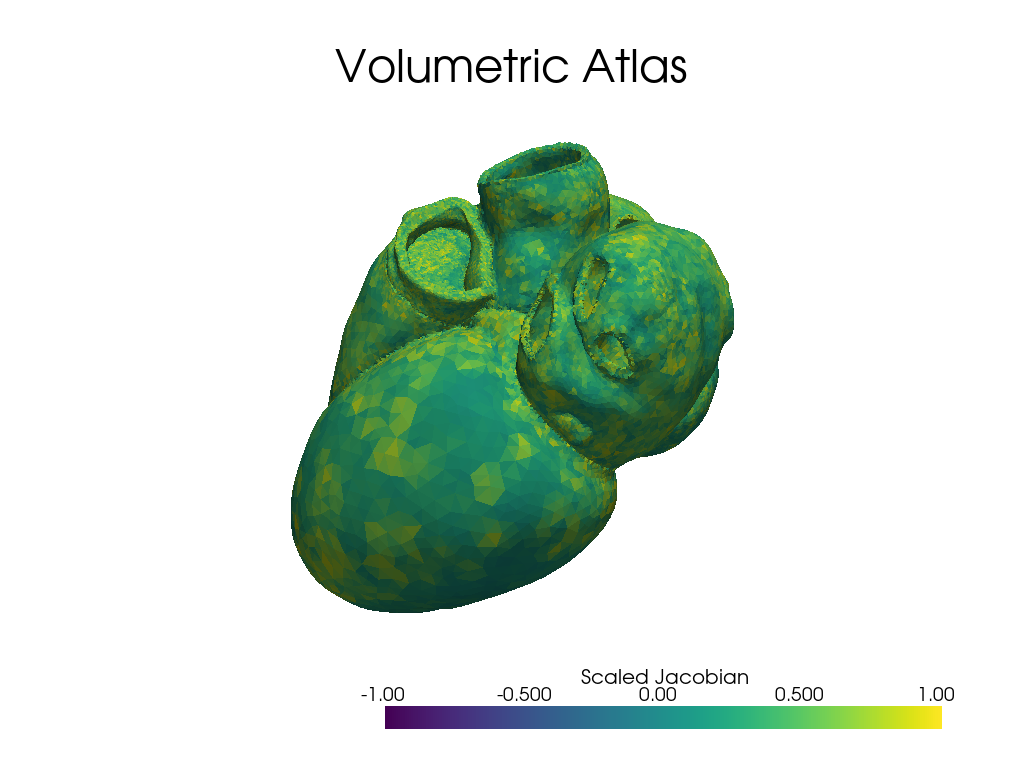

In [11]:
mesh = pyvista.read("/home/ngaggion/DATA/Leeds/VolumetricSaves/atlas.vtk")
qual = mesh.compute_cell_quality(quality_measure='scaled_jacobian')["CellQuality"]

mesh["Scaled Jacobian"] = qual

plotter = pyvista.Plotter()
plotter.add_mesh(mesh)
plotter.update_scalar_bar_range([-1, 1])
plotter.add_title("Volumetric Atlas")

plotter.screenshot('Atlas.png')
plotter.show()

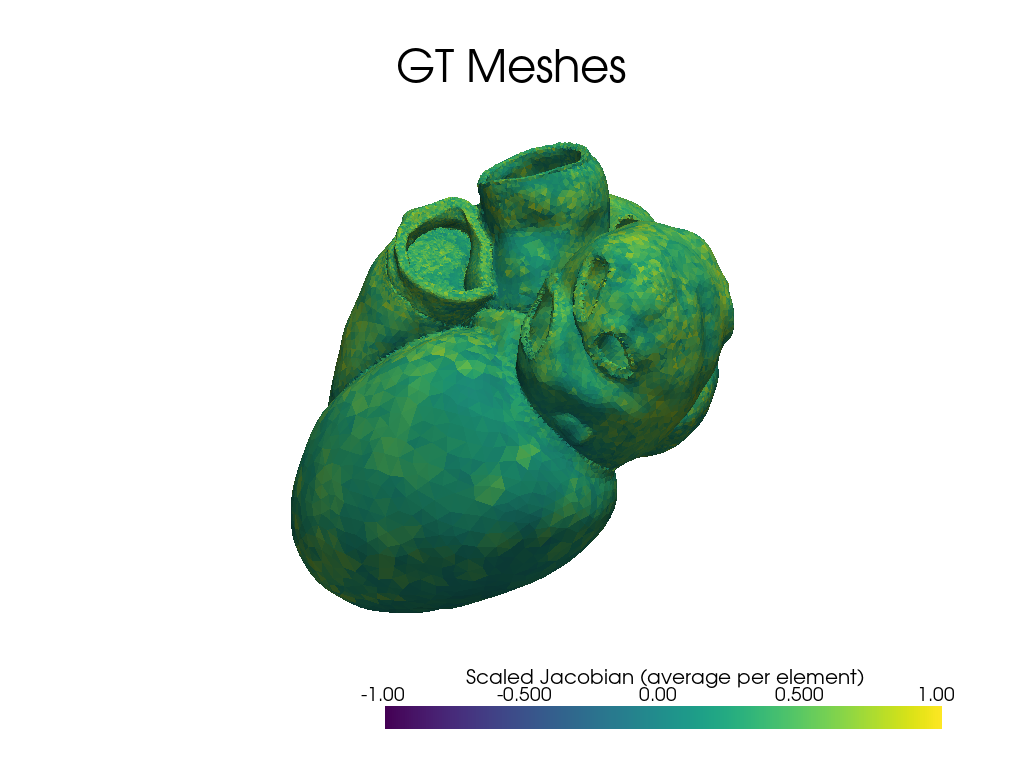

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [95]:
mesh = pyvista.read("/home/ngaggion/DATA/Leeds/VolumetricSaves/atlas.vtk")
mesh["Scaled Jacobian (average per element)"] = pyvista.convert_array(mean_quality_per_element)

pyvista.global_theme.font.color = 'black'
pyvista.global_theme.background = 'white'

plotter = pyvista.Plotter()
plotter.add_mesh(mesh)
plotter.update_scalar_bar_range([-1, 1])
plotter.add_title("GT Meshes")
plotter.show()

plotter.screenshot('GT_Mesh.png')

In [2]:
import pandas as pd
import meshio
import numpy as np

tets = np.load("/home/ngaggion/DATA/Leeds/VolumetricAtlas/vol_tets.npy")
meshes = pd.read_csv("/home/ngaggion/DATA/Leeds/PyTorch/partitions/test_mmf_vol.csv")

for m in meshes['mesh']:
    path = m.replace("../","").replace("VolumetricMeshes", "Predictions_Vol/Vol_Old")
    id = path.split("/")[3]
    time = path.split("/")[4]

    nodes = np.load(path)
    mesh = meshio.Mesh(nodes, cells = {'tetra': tets})

    savepath = "VolumetricSaves/PredNR/" + id + "_" + time + ".vtk"
    mesh.write(savepath)

In [6]:
import pyvista

for m in os.listdir("VolumetricSaves/PredNR/"):
    m = "VolumetricSaves/PredNR/"+m
    mesh = pyvista.read(m)

    qual1 = mesh.compute_cell_quality(quality_measure='scaled_jacobian')["CellQuality"]
    qual2 = mesh.compute_cell_quality(quality_measure='aspect_ratio')["CellQuality"]
    
    qual1 = pyvista.convert_array(qual1)
    qual2 = pyvista.convert_array(qual2)

    np.save(m.replace("PredNR","Pred_qualities").replace('.vtk',"_jac.npy"), qual1)
    np.save(m.replace("PredNR","Pred_qualities").replace('.vtk',"_aspect_ratio.npy"), qual2)

In [7]:
path = "VolumetricSaves/Pred_qualities/"
files = os.listdir(path)

files_jac = [file for file in files if "jac" in file]
files_asp = [file for file in files if "aspect" in file]

aux = []

for f in files_jac:
    array = np.load(path+f)
    aux.append(array.reshape(1, -1))

aux = np.concatenate(aux, axis = 0)
np.save("VolumetricSaves/pred_jac_qualities.npy", aux)

aux = []

for f in files_asp:
    array = np.load(path+f)
    aux.append(array.reshape(1, -1))

aux = np.concatenate(aux, axis = 0)
np.save("VolumetricSaves/pred_aspect_ratio_qualities.npy", aux)

In [2]:
aux = np.load("/home/ngaggion/DATA/Leeds/VolumetricSaves/predf_jac_qualities.npy")
mean_quality_per_element = aux.mean(0)

In [1]:
import numpy as np
import pyvista 

mean_quality_per_element_pred = np.load("VolumetricSaves/mean_quality_REG.npy")
mesh = pyvista.read("/home/ngaggion/DATA/Leeds/VolumetricSaves/atlas.vtk")

mesh["Scaled Jacobian (average per element)"] = pyvista.convert_array(mean_quality_per_element_pred)

pyvista.global_theme.font.color = 'black'
pyvista.global_theme.background = 'white'

plotter = pyvista.Plotter()
plotter.add_mesh(mesh)
plotter.update_scalar_bar_range([-1, 1])
plotter.add_title("Predicted Meshes")
plotter.screenshot('Pred_Mesh.png')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [1]:
import pandas as pd
import meshio
import numpy as np

tets = np.load("/home/ngaggion/DATA/Leeds/VolumetricAtlas/vol_tets.npy")
meshes = pd.read_csv("/home/ngaggion/DATA/Leeds/PyTorch/partitions/test_mmf_vol.csv")

for m in meshes['mesh']:
    path = m.replace("../","").replace("VolumetricMeshes", "Predictions_Vol/Vol_Reg_cont")
    id = path.split("/")[3]
    time = path.split("/")[4]

    nodes = np.load(path)
    mesh = meshio.Mesh(nodes, cells = {'tetra': tets})

    savepath = "VolumetricSaves/PredReg/" + id + "_" + time + ".vtk"
    mesh.write(savepath)

In [2]:
import pyvista

for m in os.listdir("VolumetricSaves/PredReg/"):
    m = "VolumetricSaves/PredReg/"+m
    mesh = pyvista.read(m)

    qual1 = mesh.compute_cell_quality(quality_measure='scaled_jacobian')["CellQuality"]    
    qual1 = pyvista.convert_array(qual1)
    np.save(m.replace("PredReg","Pred_Reg_qualities").replace('.vtk',"_jac.npy"), qual1)

In [3]:
path = "VolumetricSaves/Pred_Reg_qualities/"
files = os.listdir(path)

files_jac = [file for file in files if "jac" in file]
files_asp = [file for file in files if "aspect" in file]

aux = []

for f in files_jac:
    array = np.load(path+f)
    aux.append(array.reshape(1, -1))

aux = np.concatenate(aux, axis = 0)
np.save("VolumetricSaves/pred_reg_jac_qualities.npy", aux)

mean_quality_per_subject = aux.mean(0)
np.save("VolumetricSaves/mean_quality_REG.npy", mean_quality_per_subject)

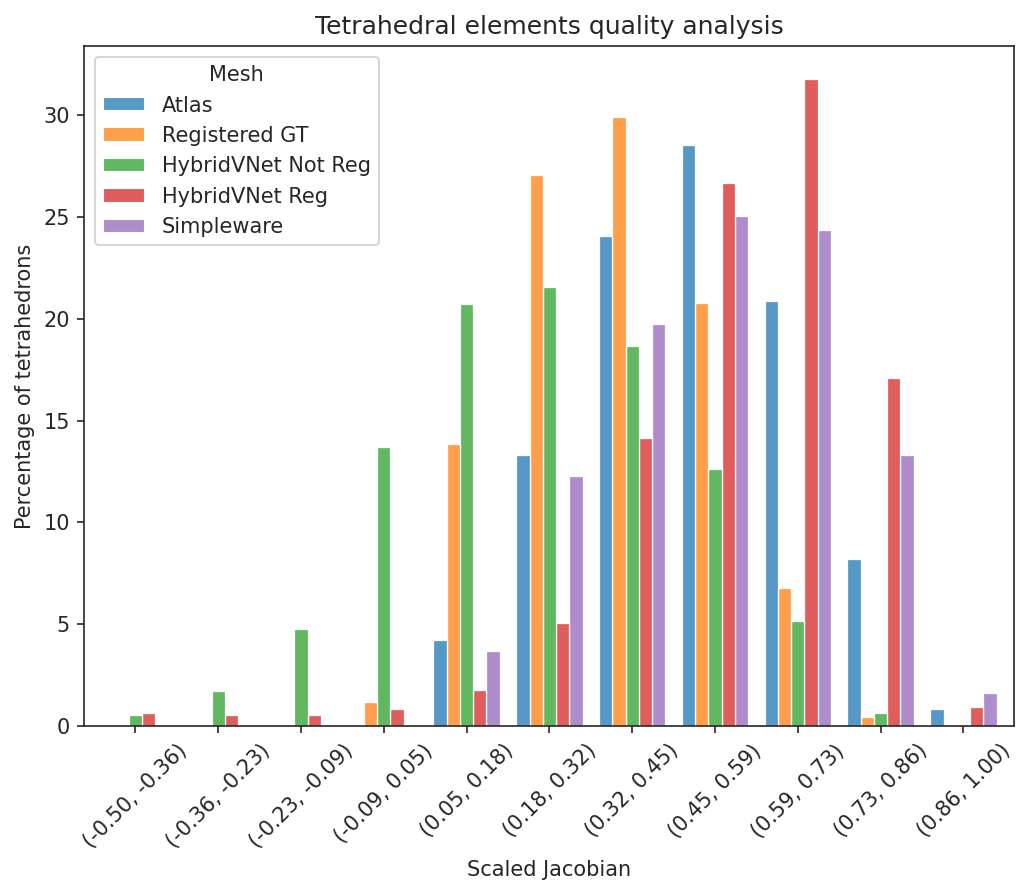

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("ticks")

plt.figure(figsize = (8, 6), dpi = 150)

atlas = np.load("VolumetricSaves/atlas_jac.npy")
mean_quality_per_element_predf = np.load("VolumetricSaves/mean_quality_NR.npy")
mean_quality_per_element_pred = np.load("VolumetricSaves/mean_quality_REG.npy")
mean_quality_per_element_gt = np.load("VolumetricSaves/mean_quality_GT.npy")
mean_ben = np.load("VolumetricSaves/Ben_meshes.npy")

df1 = pd.DataFrame(mean_quality_per_element_gt, columns = ["Quality"])
df1['Mesh'] = "Registered GT"
df2 = pd.DataFrame(atlas, columns = ["Quality"])
df2['Mesh'] = "Atlas"
df3 = pd.DataFrame(mean_quality_per_element_predf, columns = ["Quality"])
df3['Mesh'] = "HybridVNet Not Reg"
df4 = pd.DataFrame(mean_quality_per_element_pred, columns = ["Quality"])
df4['Mesh'] = "HybridVNet Reg"
df5 = pd.DataFrame(mean_ben, columns = ["Quality"])
df5['Mesh'] = "Simpleware"

dfs = pd.concat([df2, df1, df3, df4, df5])

bins = np.linspace(-0.5, 1, 12)
tickpos = []
ticks = []
for j in range(1, len(bins)):
    tickpos.append((bins[j] + bins[j-1])/2)
    ticks.append("(%.2f, %.2f)" %(bins[j-1],bins[j]))

ax = sns.histplot(x="Quality", hue="Mesh", bins = bins, multiple="dodge", data=dfs, shrink = 0.8, stat='percent', common_norm=False)
#ax = sns.histplot(x="Quality", hue="Mesh", bins = bins, multiple="dodge", data=dfs, shrink = 0.8)
ax.set_xticks(tickpos, ticks, rotation = 45)

plt.title("Tetrahedral elements quality analysis")
plt.ylabel("Percentage of tetrahedrons")
plt.xlabel("Scaled Jacobian")
plt.margins(x=0.02)

plt.savefig('VolumetricSaves/histogram.pdf', bbox_inches='tight', dpi=200)
